In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from mpl_toolkits import mplot3d
from sklearn import manifold, decomposition

%matplotlib notebook

In [2]:
r = requests.get('http://nwhacks-2018.kevinyap.ca:5001/data')
data = r.json()

In [3]:
DIMENSIONALITY = 3

EMOTIONS = {
    'happy': 0,
    'sad': 1,
    'angry': 2,
    'surprised': 3,
}

X = []
y = []

for d in data:
    y.append(EMOTIONS[d['emotion']])
    X.append([v for k, v in sorted(d.items()) if k != 'emotion'])
    
X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(100, 51)
(100,)


In [4]:
print("Computing PCA projection")
X_pca = decomposition.TruncatedSVD(n_components=DIMENSIONALITY).fit_transform(X)

print("Computing MDS manifold")
X_mds = manifold.MDS(n_components=DIMENSIONALITY).fit_transform(X)

Computing PCA projection
Computing MDS manifold


<IPython.core.display.Javascript object>


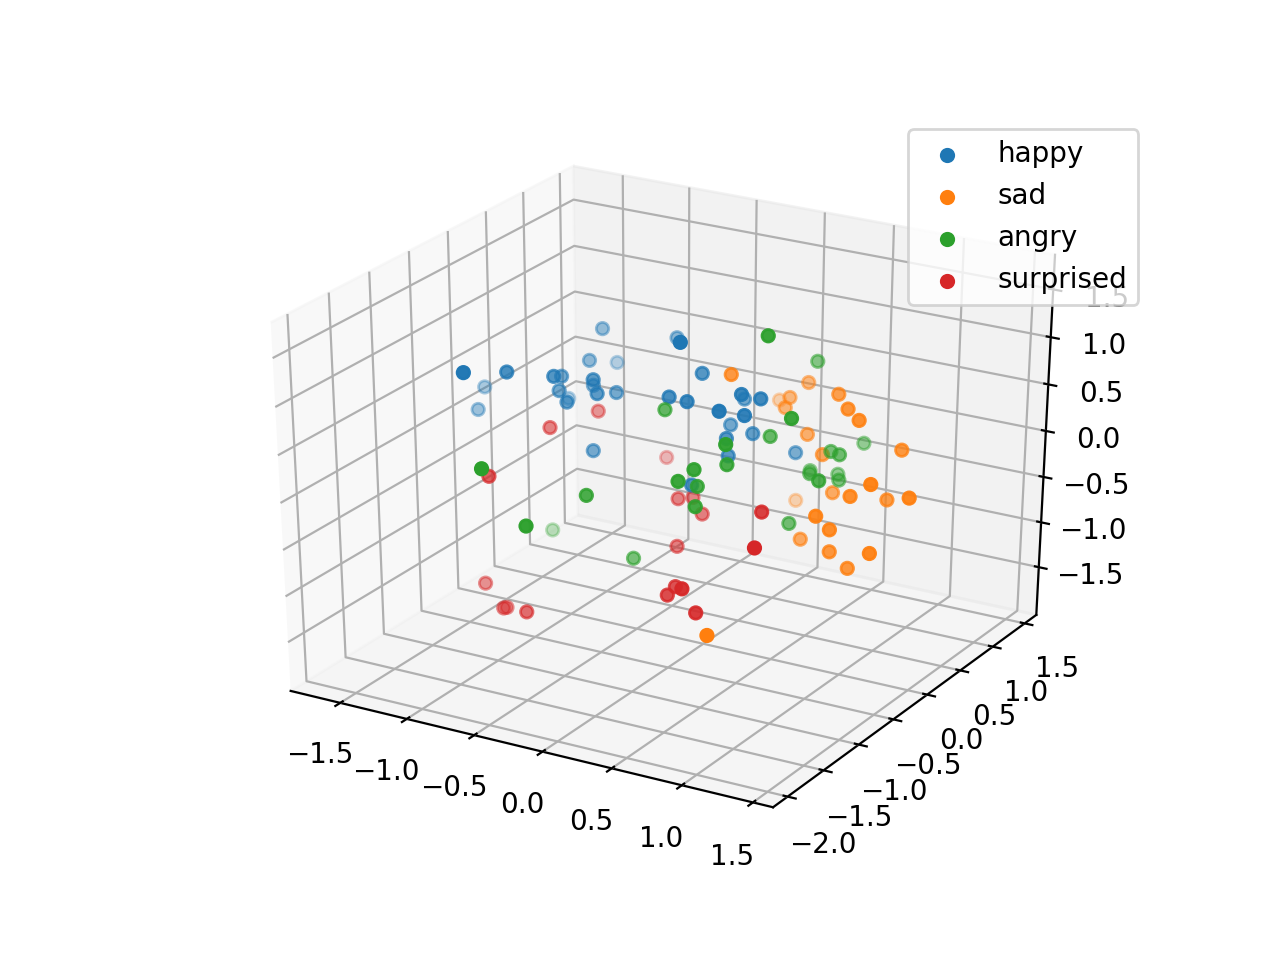

In [5]:
fig = plt.figure()
if DIMENSIONALITY == 3:
    ax = plt.axes(projection='3d')
else:
    ax = plt.axes()

for emotion, i in EMOTIONS.items():
#     X = X_pca[y == i]
    X = X_mds[y == i]
    
    ax.scatter(*(X[:, i] for i in range(DIMENSIONALITY)), label=emotion)

plt.legend()